<a href="https://colab.research.google.com/github/josearevalobezic/Game_simulation-_climbing_a_building_with_a_dice/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

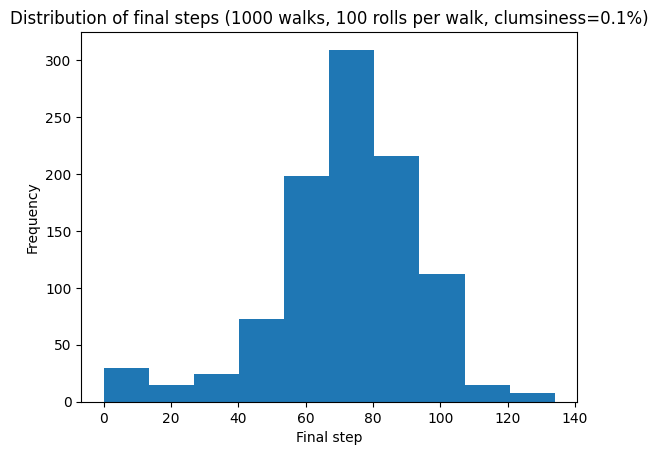

Probability of finishing on or above the step 60 (1000 walks, 100 rolls per walk, clumsiness=0.1%): 0.784


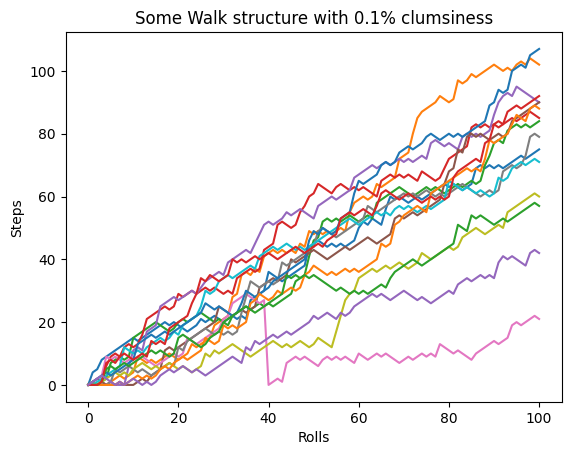

In [66]:
import numpy as np #import numpy library to work with arrays
import matplotlib.pyplot as plt #import matplotlib for visualization
#np.random.seed(123) #optional if we want to mantain the analysis consistent

"""parameter 1: The step we are aiming to reach in the game"""
limit_step = 60
"""parameter 2: number of times the dice will be rolled"""
num_rolls = 100
"""parameter 3: posibility of falling while walking"""
clumsiness = 0.001
"""parameter 4: amount of times the walk wiill be tested"""
total_walks = 1000



def simulate_random_walk(num_rolls):
  """Simulating a single random walk."""
  random_walk = [0]
  for i in range(num_rolls):
    #determine next step
    step = random_walk[-1] #the last step
    dice = np.random.randint(1,7) #rolling the dice, integer between 1 and 6
    if dice <= 2: #if the dice results 1 or two, diminish one step
      step = max(0,step - 1) #steo can´t go bellow 0
    elif dice <= 5:#dice between 3 or 5, increase one step
      step= step + 1
    else:
      step = step + np.random.randint(1,7)#dice 6, roll again and increment the result to step

    if np.random.rand() <= clumsiness: #asuming clumsiness, if we fall steps turns 0
      step = 0

    random_walk.append(step) #append next step to random walk

  return(random_walk) #result will be the random_walk list



def run_simulation (total_walks, num_rolls):
  """Running multiple simulations of random walks."""
  all_walks =[] # Initialize as an empty list
  for i in range (total_walks):
    all_walks.append(simulate_random_walk(num_rolls))#listing each walk
  return np.array(all_walks)#turning list into array. Each walk is a row

def analyze_random_walk (all_walks_array):
  """Analyzing the results of multiple random walks."""
  np_aw_t = np.transpose(all_walks_array) #transposing the array. Each row now represents a dice roll
  ends = np_aw_t[-1,:]#array of each walk final step

  plt.hist(ends)
  # Added parameters to the title
  plt.title(f"Distribution of final steps ({total_walks} walks, {num_rolls} rolls per walk, clumsiness={clumsiness*100}%)")
  plt.xlabel("Final step")
  plt.ylabel("Frequency")
  plt.show()

  probability_above_limit = np.mean(ends >= limit_step)#proportion of walks which ended on the 60 step or above. Gives the probability of reaching the 60 step after the N amount of rolling dice
  # Added parameters to the print statement
  print(f"Probability of finishing on or above the step {limit_step} ({total_walks} walks, {num_rolls} rolls per walk, clumsiness={clumsiness*100}%): {probability_above_limit:.3f}")

def fifteen_walks(all_walks_array):
  """Plotting 15 walks."""
  fifteen_walks_data = np.transpose(all_walks_array[:15])
  plt.plot(fifteen_walks_data)
  plt.title(f"Some Walk structure with {clumsiness*100}% clumsiness")
  plt.xlabel("Rolls")
  plt.ylabel("Steps")
  plt.show()


all_walks_data = run_simulation(total_walks, num_rolls)
analyze_random_walk(all_walks_data)
fifteen_walks(all_walks_data)